# Подключаем библиотеки

In [20]:
from MainWorkers import FUNCOFMETHODS, pipe, get_gen_sample, times_when_method_better, RunExperiment
import numpy as np
import scipy.stats as sts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
from SomeFunc import comparison_of_two

In [21]:
ResultsForMax, ResultsForSum, Samples, Ultradists = RunExperiment(1000, 5, 100, FUNCOFMETHODS)

KeyboardInterrupt: 

In [ ]:
# Сохраняем данные в логи
# now = str(datetime.datetime.today().replace(microsecond=0))

# with open(f"./TestSamples/Samples/{now}", "wb") as fp:
#     pickle.dump(Samples, fp)

# with open("./TestSamples/Samples/s1", "rb") as fp:
#     sam = pickle.load(fp)

# Подсчет результатов

In [ ]:
ResultsForMax.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,77.498538,77.498538,42.608598,42.608598,38.749269,63.918199
1,76.100579,76.100579,40.371785,38.143357,38.050290,38.435901
2,98.878021,119.834816,59.579473,53.837320,49.439011,80.735923
3,61.049900,78.052615,36.198837,36.198837,30.524950,41.872725
4,77.991573,77.991573,40.933453,44.671286,38.995787,43.423153


In [ ]:
ResultsForSum.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,45.761725,34.555958,32.899089,32.899089,34.156799,49.802533
1,44.802972,50.374561,39.519237,39.519237,39.519237,39.519237
2,76.510667,58.595503,51.539366,57.354875,55.595551,43.202381
3,35.200153,63.878764,24.707761,24.707761,26.977316,23.143350
4,50.872927,55.523326,34.570733,34.570733,34.570733,34.570733


# Матрица сравнения результатов

<AxesSubplot: >

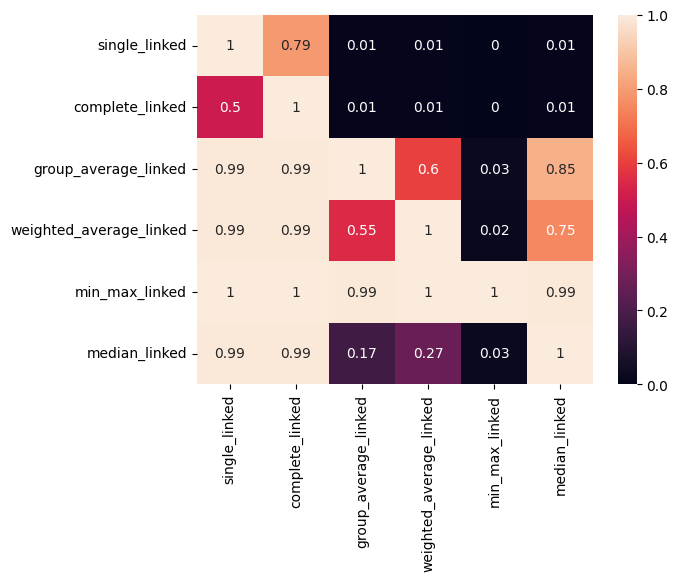

In [ ]:
sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

<AxesSubplot: >

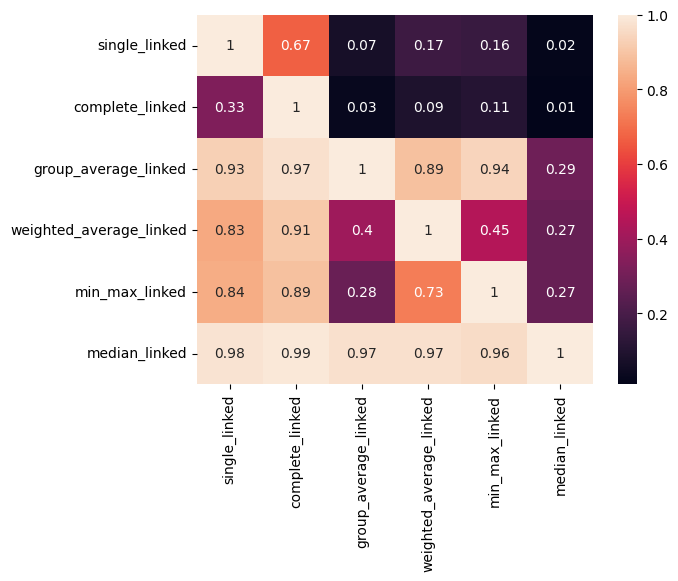

In [ ]:
sns.heatmap(times_when_method_better(ResultsForSum), annot=True)

In [ ]:
ResultsForSum.query("median_linked <= min_max_linked").shape[0] 

96

# Проверка на монотонность

In [ ]:
for name_of_method in Ultradists.keys():
    print(name_of_method.upper())
    flag = 0
    for num, ultra in enumerate(Ultradists[name_of_method]):
        if sorted(ultra) != ultra:
            print(f"Пример номер {num}")
            print(ultra)
            print()
            print()
            flag = 1
    if flag != 1:
        print("the method is monotonous")
        print()

SINGLE_LINKED
the method is monotonous

COMPLETE_LINKED
the method is monotonous

GROUP_AVERAGE_LINKED
the method is monotonous

WEIGHTED_AVERAGE_LINKED
the method is monotonous

MIN_MAX_LINKED
the method is monotonous

MEDIAN_LINKED
the method is monotonous



### Анализ (Отлов примеров, когда МинМакс дает результаты хуже других методов)

In [ ]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'single_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем single_linked
Случаев не обнаружено


In [ ]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'complete_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем complete_linked
Случаев не обнаружено


In [ ]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'weighted_average_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем weighted_average_linked
Номер выборки 43
[[155.8 152.7]
 [124.2 166.1]
 [ 94.5  81.4]
 [164.1 146.2]
 [103.4 116.2]]

Номер выборки 99
[[111.1 104.2]
 [142.3  97.6]
 [143.4 163.4]
 [ 93.5 104.1]
 [112.6 164.8]]



In [ ]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'group_average_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем group_average_linked
Номер выборки 40
[[160.8 156.6]
 [194.  144.3]
 [171.5 175.6]
 [212.8 184.6]
 [199.1 231.5]]

Номер выборки 43
[[155.8 152.7]
 [124.2 166.1]
 [ 94.5  81.4]
 [164.1 146.2]
 [103.4 116.2]]

Номер выборки 99
[[111.1 104.2]
 [142.3  97.6]
 [143.4 163.4]
 [ 93.5 104.1]
 [112.6 164.8]]



In [ ]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'median_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем median_linked
Номер выборки 25
[[120.9  71.2]
 [195.  230.7]
 [ 79.9 115.8]
 [130.4 159.6]
 [128.6 187. ]]

Номер выборки 43
[[155.8 152.7]
 [124.2 166.1]
 [ 94.5  81.4]
 [164.1 146.2]
 [103.4 116.2]]

Номер выборки 99
[[111.1 104.2]
 [142.3  97.6]
 [143.4 163.4]
 [ 93.5 104.1]
 [112.6 164.8]]



In [ ]:
# test_data = np.round_(Samples[27] * 100)
test_data = Samples[27]
pd.DataFrame(test_data, columns=['x', 'y'])

,x,y
0,143.1,171.3
1,190.5,189.9
2,75.2,53.1
3,75.5,118.0
4,147.9,154.3


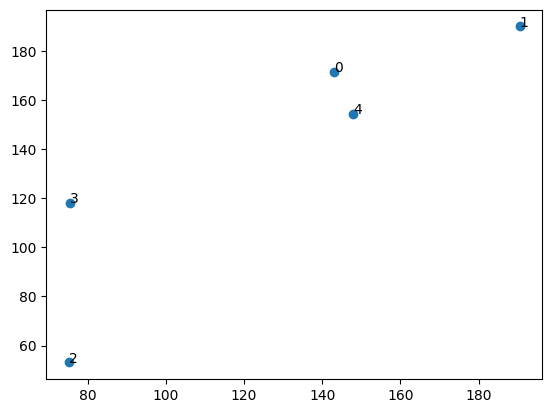

In [ ]:
plt.scatter(test_data[:, 0], test_data[:, 1])

for i in range(len(test_data)):
    plt.text(test_data[i][0], test_data[i][1] + 0.03, str(i))

In [ ]:
from MinMaxHierarchy import MinMaxHierarchy

clasters, init_dist, ultra_dists = MinMaxHierarchy(test_data, True)
print(ultra_dists)

Distance matrix: 0 step
            0           1           2           3           4
0    0.000000   50.918759  136.314526   86.085132   17.664654
1   50.918759    0.000000  178.908720  135.626730   55.516844
2  136.314526  178.908720    0.000000   64.900693  124.606300
3   86.085132  135.626730   64.900693    0.000000   80.990432
4   17.664654   55.516844  124.606300   80.990432    0.000000

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(0, 4)', '1', '2', '3'], dtype='<U25'))
Distance matrix: 1 step
            (0, 4)           1           2           3
(0, 4)    0.000000   53.217802  130.460413   83.537782
1        53.217802    0.000000  178.908720  135.626730
2       130.460413  178.908720    0.000000   64.900693
3        83.537782  135.626730   64.900693    0.000000



('Clusters:', array(['((0, 4), 1)', '2', '3'], dtype='<U25'))
Distance matrix: 2 step
             ((0, 4), 1)           2           3
((0, 4), 1)     0.000000  151.757510  108.308581
2             151.7575

In [ ]:
from HierarchyClusteringWithoutLogs import hierarchy
from Linkages import single_linked
from Linkages import weighted_average_linked

hierarchy(test_data, metric='euclidean', method=weighted_average_linked, logs_turn_on=True)

Distance matrix: 0 step
            0           1           2           3           4
0    0.000000   50.918759  136.314526   86.085132   17.664654
1   50.918759    0.000000  178.908720  135.626730   55.516844
2  136.314526  178.908720    0.000000   64.900693  124.606300
3   86.085132  135.626730   64.900693    0.000000   80.990432
4   17.664654   55.516844  124.606300   80.990432    0.000000

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(0, 4)', '1', '2', '3'], dtype='<U25'))
Distance matrix: 1 step
            0           1           2           3
0    0.000000   53.217802  130.460413   83.537782
1   53.217802    0.000000  178.908720  135.626730
2  130.460413  178.908720    0.000000   64.900693
3   83.537782  135.626730   64.900693    0.000000



('Clusters:', array(['((0, 4), 1)', '2', '3'], dtype='<U25'))
Distance matrix: 2 step
            0           1           2
0    0.000000  154.684566  109.582256
1  154.684566    0.000000   64.900693
2  109.582256   64.900693    0.

(((2, 3), ((0, 4), 1)),
 array([[  0.        ,  50.91875882, 136.31452601,  86.08513228,
          17.66465397],
        [ 50.91875882,   0.        , 178.90871974, 135.6267304 ,
          55.51684429],
        [136.31452601, 178.90871974,   0.        ,  64.90069337,
         124.6063    ],
        [ 86.08513228, 135.6267304 ,  64.90069337,   0.        ,
          80.99043153],
        [ 17.66465397,  55.51684429, 124.6063    ,  80.99043153,
           0.        ]]),
 [17.664653973401464,
  53.217801556492375,
  64.90069337071833,
  132.13341126436086])

In [ ]:
from MedianHierarchy import MedianHierarchy

clasters, init_dist, ultra_dists = MedianHierarchy(test_data, True)
print(ultra_dists)

Distance matrix: 0 step
            0           1           2           3           4
0    0.000000   50.918759  136.314526   86.085132   17.664654
1   50.918759    0.000000  178.908720  135.626730   55.516844
2  136.314526  178.908720    0.000000   64.900693  124.606300
3   86.085132  135.626730   64.900693    0.000000   80.990432
4   17.664654   55.516844  124.606300   80.990432    0.000000

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(0, 4)', '1', '2', '3'], dtype='<U25'))
Distance matrix: 1 step
            (0, 4)           1           2           3
(0, 4)    0.000000   53.217802  130.460413   83.537782
1        53.217802    0.000000  178.908720  135.626730
2       130.460413  178.908720    0.000000   64.900693
3        83.537782  135.626730   64.900693    0.000000



('Clusters:', array(['((0, 4), 1)', '2', '3'], dtype='<U25'))
Distance matrix: 2 step
             ((0, 4), 1)           2          3
((0, 4), 1)     0.000000  136.314526  86.085132
2             136.314526